#### **Install Library**

In [0]:
pip install PySastrawi

In [0]:
pip install WordCloud

#### **Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
import time

from wordcloud import WordCloud
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords')
stop = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### **Load Dataset**

In [0]:
df = pd.read_excel('https://raw.githubusercontent.com/farhanalfaa/twitter-sentiment-analysis/master/dataset/5000_tweets.xlsx', index_col = 0)

In [5]:
df.shape

(5036, 4)

In [6]:
df.tail()

,screen_name,username,text,label
5031,haremarem,agnostheis,"Hidup dimasa revolusi industri, kaya latar vio...",0
5032,haremarem,agnostheis,Kapan jembatan ki isa sepi kang bocahpic.twitt...,-1
5033,haremarem,agnostheis,Testimoni pesugihan online nya guys?pic.twitte...,-1
5034,haremarem,agnostheis,Agama sudah diperkontenkan bukan lagi diperjua...,1
5035,haremarem,agnostheis,"Mau jadi diaspora, yg study pake beasiswa nega...",0


**Create a New Dataset without Unrelated Tweets**

In [0]:
pos_tweet = df['label'] == 1
neu_tweet = df['label'] == 0
neg_tweet = df['label'] == -1

new_df = (df[(pos_tweet) | (neg_tweet) | (neu_tweet)])

In [0]:
new_df = new_df[['text', 'label']]

In [9]:
new_df.shape

(3662, 2)

#### **Checking Nan Values**

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 5035
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3662 non-null   object
 1   label   3662 non-null   object
dtypes: object(2)
memory usage: 85.8+ KB


#### **Character and Word Visualization**



In [0]:
char_len = new_df['text'].str.len()
word_len = new_df['text'].str.split().map(lambda x: len(x))

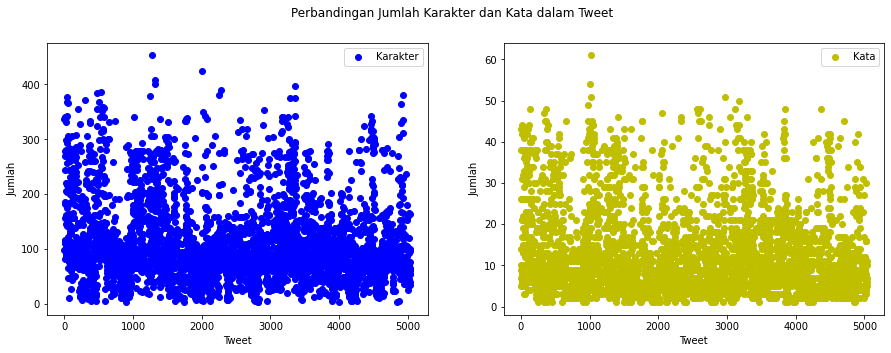

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Perbandingan Jumlah Karakter dan Kata dalam Tweet')

ax1.scatter(char_len.index, char_len.values, color='b', label='Karakter')
ax1.set_xlabel('Tweet')
ax1.set_ylabel('Jumlah')
ax1.legend()

ax2.scatter(word_len.index, word_len.values, color='y', label='Kata')
ax2.set_xlabel('Tweet')
ax2.set_ylabel('Jumlah')
ax2.legend()

plt.show()

## **Data Preprocessing**

**Remove URL, Mention Tag, Hashtag, and Numbering**

In [0]:
text_list = new_df['text'].tolist()

def remove_tag(text):
  text = re.sub(r'pic.twitter\S+', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'#\S+', '', text)
  text = re.sub('\d+', '', text)
  return text

tag_output = [remove_tag(sen) for sen in text_list]

new_df['without_tag'] = tag_output

In [14]:
new_df.head()

,text,label,without_tag
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …"
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …


**Spell Checker**

In [0]:
def spell_checker(text):
  pattern = re.compile(r'(.)\1{2,}')
  text = pattern.sub(r'\1\1', text)
  return text

spell_check = [spell_checker(sen) for sen in tag_output]

new_df['reduce_lenghtening'] = spell_check

In [16]:
new_df.head()

,text,label,without_tag,reduce_lenghtening
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …"
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …


**Remove Punctuation**

In [0]:
punct = list(string.punctuation)

def remove_punc(text):
  for punctuation in punct:
    text = text.replace(punctuation, ' ')
  return text

punct_output = [remove_punc(sen) for sen in spell_check]

new_df['without_punc'] = punct_output

In [18]:
new_df.head()

,text,label,without_tag,reduce_lenghtening,without_punc
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …",Kayaknya Dokdes pernah bikin thread ini ya …
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …


**Lowercase Process**

In [0]:
def to_lowercase(text):
  return text.lower() 

lower_text = [to_lowercase(sen) for sen in punct_output]

new_df['to_lowercase'] = lower_text

In [20]:
new_df.head()

,text,label,without_tag,reduce_lenghtening,without_punc,to_lowercase
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,laporan pandangan mata langsung dari tkp …
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,sayangnya ada sekelompok orang yang sedang dip...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,negara kita akan segera menjadi negara yang sa...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …",Kayaknya Dokdes pernah bikin thread ini ya …,kayaknya dokdes pernah bikin thread ini ya …
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,aku milih nasi materai …


**Stemming Process**

In [0]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_preprocessing(sens):
  return stemmer.stem(sens)

stem_output = [stemming_preprocessing(sen) for sen in lower_text]

new_df['stemming'] = stem_output

In [22]:
new_df.head()

,text,label,without_tag,reduce_lenghtening,without_punc,to_lowercase,stemming
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,laporan pandangan mata langsung dari tkp …,lapor pandang mata langsung dari tkp
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,sayangnya ada sekelompok orang yang sedang dip...,sayang ada kelompok orang yang sedang pakai ge...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,negara kita akan segera menjadi negara yang sa...,negara kita akan segera jadi negara yang sanga...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …",Kayaknya Dokdes pernah bikin thread ini ya …,kayaknya dokdes pernah bikin thread ini ya …,kayak dokdes pernah bikin thread ini ya
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,aku milih nasi materai …,aku milih nasi materai


**Tokenize**

In [0]:
token = new_df['stemming'].str.split()
token_list = token.values.tolist()

new_df['tokenize'] = token_list

In [24]:
new_df.head()

,text,label,without_tag,reduce_lenghtening,without_punc,to_lowercase,stemming,tokenize
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,laporan pandangan mata langsung dari tkp …,lapor pandang mata langsung dari tkp,"[lapor, pandang, mata, langsung, dari, tkp]"
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,sayangnya ada sekelompok orang yang sedang dip...,sayang ada kelompok orang yang sedang pakai ge...,"[sayang, ada, kelompok, orang, yang, sedang, p..."
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,negara kita akan segera menjadi negara yang sa...,negara kita akan segera jadi negara yang sanga...,"[negara, kita, akan, segera, jadi, negara, yan..."
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …",Kayaknya Dokdes pernah bikin thread ini ya …,kayaknya dokdes pernah bikin thread ini ya …,kayak dokdes pernah bikin thread ini ya,"[kayak, dokdes, pernah, bikin, thread, ini, ya]"
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,aku milih nasi materai …,aku milih nasi materai,"[aku, milih, nasi, materai]"


**Frequency Words**

In [0]:
from nltk.probability import FreqDist

result = []
for sublist in token_list:
    for item in sublist:
        result.append(item)

In [0]:
commons_word = nltk.FreqDist(result)

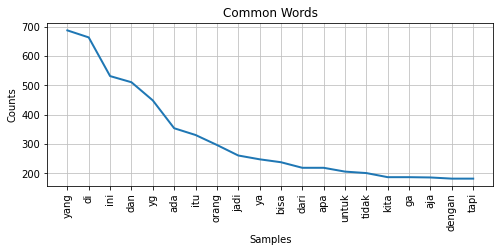

In [27]:
fig, ax = plt.subplots(figsize=(8,3))

commons_word.plot(20,cumulative=False, title='Common Words')

plt.show()

**Remove Stopwords**

In [0]:
stoplist     = stopwords.words('indonesian')
new_stoplist = ['yg', 'kalo', 'aja', 'gw', 'udah', 'ken', 'gin', 'klo', 'sih', 'nih'] 

stoplist.extend(new_stoplist)

stoplist.remove('tidak')

In [0]:


def remove_stopwords(tokens):
  return [word for word in tokens if word not in stoplist]

stopwords_output = [remove_stopwords(sen) for sen in token_list]

new_df['without_stopwords'] = stopwords_output

In [30]:
new_df.tail()

,text,label,without_tag,reduce_lenghtening,without_punc,to_lowercase,stemming,tokenize,without_stopwords
5031,"Hidup dimasa revolusi industri, kaya latar vio...",0,"Hidup dimasa revolusi industri, kaya latar vio...","Hidup dimasa revolusi industri, kaya latar vio...",Hidup dimasa revolusi industri kaya latar vio...,hidup dimasa revolusi industri kaya latar vio...,hidup masa revolusi industri kaya latar violet...,"[hidup, masa, revolusi, industri, kaya, latar,...","[hidup, revolusi, industri, kaya, latar, viole..."
5032,Kapan jembatan ki isa sepi kang bocahpic.twitt...,-1,Kapan jembatan ki isa sepi kang bocah,Kapan jembatan ki isa sepi kang bocah,Kapan jembatan ki isa sepi kang bocah,kapan jembatan ki isa sepi kang bocah,kapan jembatan ki isa sepi kang bocah,"[kapan, jembatan, ki, isa, sepi, kang, bocah]","[jembatan, ki, isa, sepi, kang, bocah]"
5033,Testimoni pesugihan online nya guys?pic.twitte...,-1,Testimoni pesugihan online nya guys?,Testimoni pesugihan online nya guys?,Testimoni pesugihan online nya guys,testimoni pesugihan online nya guys,testimoni sugih online nya guys,"[testimoni, sugih, online, nya, guys]","[testimoni, sugih, online, nya, guys]"
5034,Agama sudah diperkontenkan bukan lagi diperjua...,1,Agama sudah diperkontenkan bukan lagi diperjua...,Agama sudah diperkontenkan bukan lagi diperjua...,Agama sudah diperkontenkan bukan lagi diperjua...,agama sudah diperkontenkan bukan lagi diperjua...,agama sudah konten bukan lagi diperjualbelikan,"[agama, sudah, konten, bukan, lagi, diperjualb...","[agama, konten, diperjualbelikan]"
5035,"Mau jadi diaspora, yg study pake beasiswa nega...",0,"Mau jadi diaspora, yg study pake beasiswa nega...","Mau jadi diaspora, yg study pake beasiswa nega...",Mau jadi diaspora yg study pake beasiswa nega...,mau jadi diaspora yg study pake beasiswa nega...,mau jadi diaspora yg study pake beasiswa negar...,"[mau, jadi, diaspora, yg, study, pake, beasisw...","[diaspora, study, pake, beasiswa, negara, lupa..."


In [31]:
print(stoplist)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [0]:
from nltk.probability import FreqDist

r_stopwords = []
for sublist in stopwords_output:
    for item in sublist:
        r_stopwords.append(item)

In [0]:
k_stopwords = nltk.FreqDist(r_stopwords)

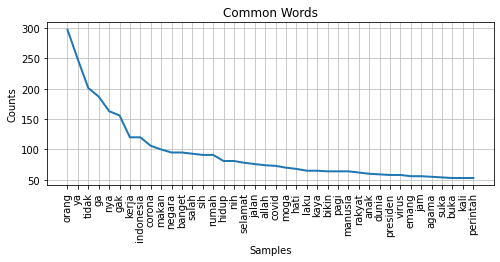

In [34]:
fig, ax = plt.subplots(figsize=(8,3))

k_stopwords.plot(40,cumulative=False, title='Common Words')

plt.show()

## **Result Cleaning Process**

In [0]:
result = [' '.join(sen) for sen in stopwords_output]

new_df['clean_text'] = result
new_df = new_df[['clean_text', 'label']]

In [36]:
new_df.head()

,text,clean_text,label
0,Laporan pandangan mata langsung dari TKPhttps:...,lapor pandang mata langsung tkp,0
1,Sayangnya ada sekelompok orang yang sedang dip...,sayang kelompok orang pakai gerak hancur kerja...,-1
2,Negara kita akan segera menjadi negara yang sa...,negara negara hitung utopia wujud nyata nikel ...,1
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,kayak dokdes bikin thread ya,0
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,milih nasi materai,0


### **WordCloud Visualization**

**Show Negative Word Cloud**

In [0]:
neg_tweets = new_df[new_df.label == -1]
neg_string = []

for word in neg_tweets.clean_text:
  neg_string.append(word)

neg_string = pd.Series(neg_string).str.cat(sep=' ')

**Show Neutral Word Cloud**

In [0]:
neu_tweets = new_df[new_df.label == 0]
neu_string = []

for word in neu_tweets.clean_text:
  neu_string.append(word)

neu_string = pd.Series(neu_string).str.cat(sep=' ')

**Show Positive Word Cloud**

In [0]:
pos_tweets = new_df[new_df.label == 1]
pos_string = []

for word in pos_tweets.clean_text:
  pos_string.append(word)

pos_string = pd.Series(pos_string).str.cat(sep=' ')

**Visualization WordCloud**

In [0]:
wordcloud1 = WordCloud(width = 1800,
                      height = 800,
                      background_color='white',
                      max_font_size = 200).generate(neg_string)

wordcloud2 = WordCloud(width = 1800,
                      height = 800,
                      background_color='white',
                      max_font_size = 200).generate(neu_string)

wordcloud3 = WordCloud(width = 1800,
                      height = 800,
                      background_color='white',
                      max_font_size = 200).generate(pos_string)

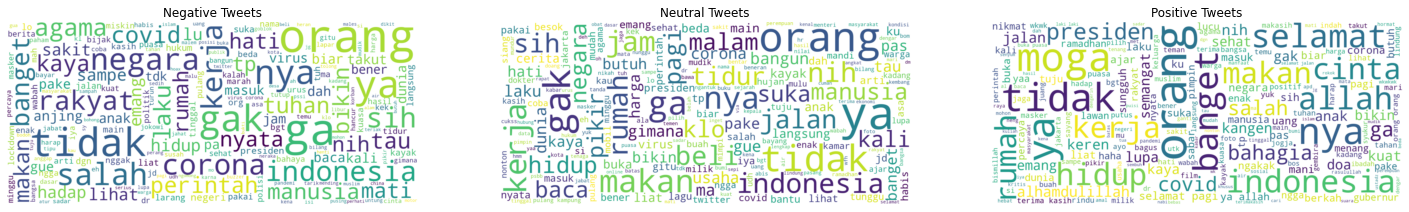

In [78]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Negative Tweets')

ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Neutral Tweets')

ax3.imshow(wordcloud3, interpolation='bilinear')
ax3.axis('off')
ax3.set_title('Positive Tweets')

plt.show()


### **Export to Excel File**

In [0]:
# from google.colab import files

# new_df.to_excel('clean_dataset.xlsx') 
# files.download('clean_dataset.xlsx')